## Prediction using Decision Tree  Algorithm :

Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.

### Tasks:

    * Load the Dataset
    * Explore the Dataset
    * Data Preprocessing
    * Train Test split
    * Model Creation
    * Model Visulization
    * Model Accuracy


In [7]:
# importing needed libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

### Loading the Dataset

In [4]:
import pandas as pd

In [9]:
df = pd.read_csv('Iris.csv')

### Data Exploration

In [8]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* There are no missing values
* There is high corelation between features
* Dataset is almost normally distributed
* Id column is not required

### Data Preprocessing

In [11]:
# Droping ID column
df.drop(columns=['Id'],inplace = True)

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Species
Iris-setosa        AxesSubplot(0.125,0.11;0.775x0.77)
Iris-versicolor    AxesSubplot(0.125,0.11;0.775x0.77)
Iris-virginica     AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

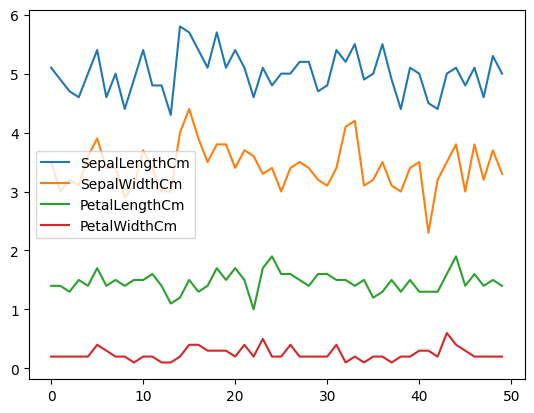

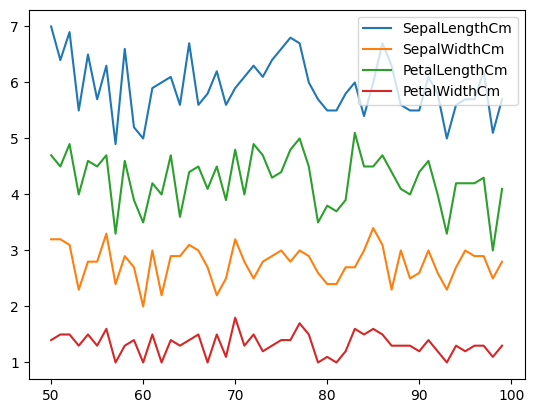

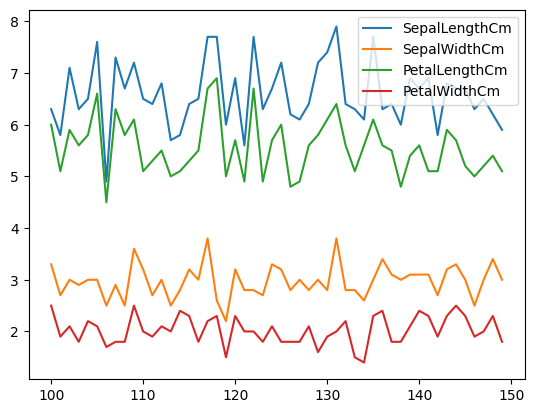

In [23]:
df.groupby(by=['Species']).plot()

### Train Test Split

<AxesSubplot:>

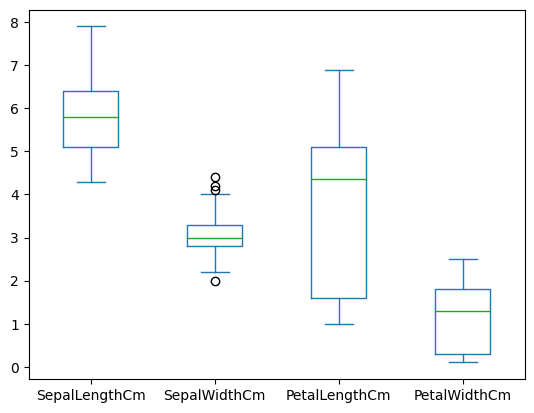

In [26]:
df.plot(kind = 'box')

In [29]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [30]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
x_data = df.drop(columns=['Species'])

In [32]:
y_data = df.Species

In [33]:
x_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
y_data

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.30,random_state=200)

### Model Creation

In [36]:
dt_model = DecisionTreeClassifier()

In [37]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

### Model Visualization

[Text(0.5, 0.9166666666666666, 'PetalLengthCm <= 2.5\ngini = 0.664\nsamples = 105\nvalue = [32, 34, 39]\nclass = 2'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = 0'),
 Text(0.5769230769230769, 0.75, 'PetalWidthCm <= 1.75\ngini = 0.498\nsamples = 73\nvalue = [0, 34, 39]\nclass = 2'),
 Text(0.3076923076923077, 0.5833333333333334, 'PetalLengthCm <= 4.95\ngini = 0.229\nsamples = 38\nvalue = [0, 33, 5]\nclass = 1'),
 Text(0.15384615384615385, 0.4166666666666667, 'PetalWidthCm <= 1.65\ngini = 0.061\nsamples = 32\nvalue = [0, 31, 1]\nclass = 1'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]\nclass = 1'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = 2'),
 Text(0.46153846153846156, 0.4166666666666667, 'PetalWidthCm <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = 2'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = 2'),
 Text(0

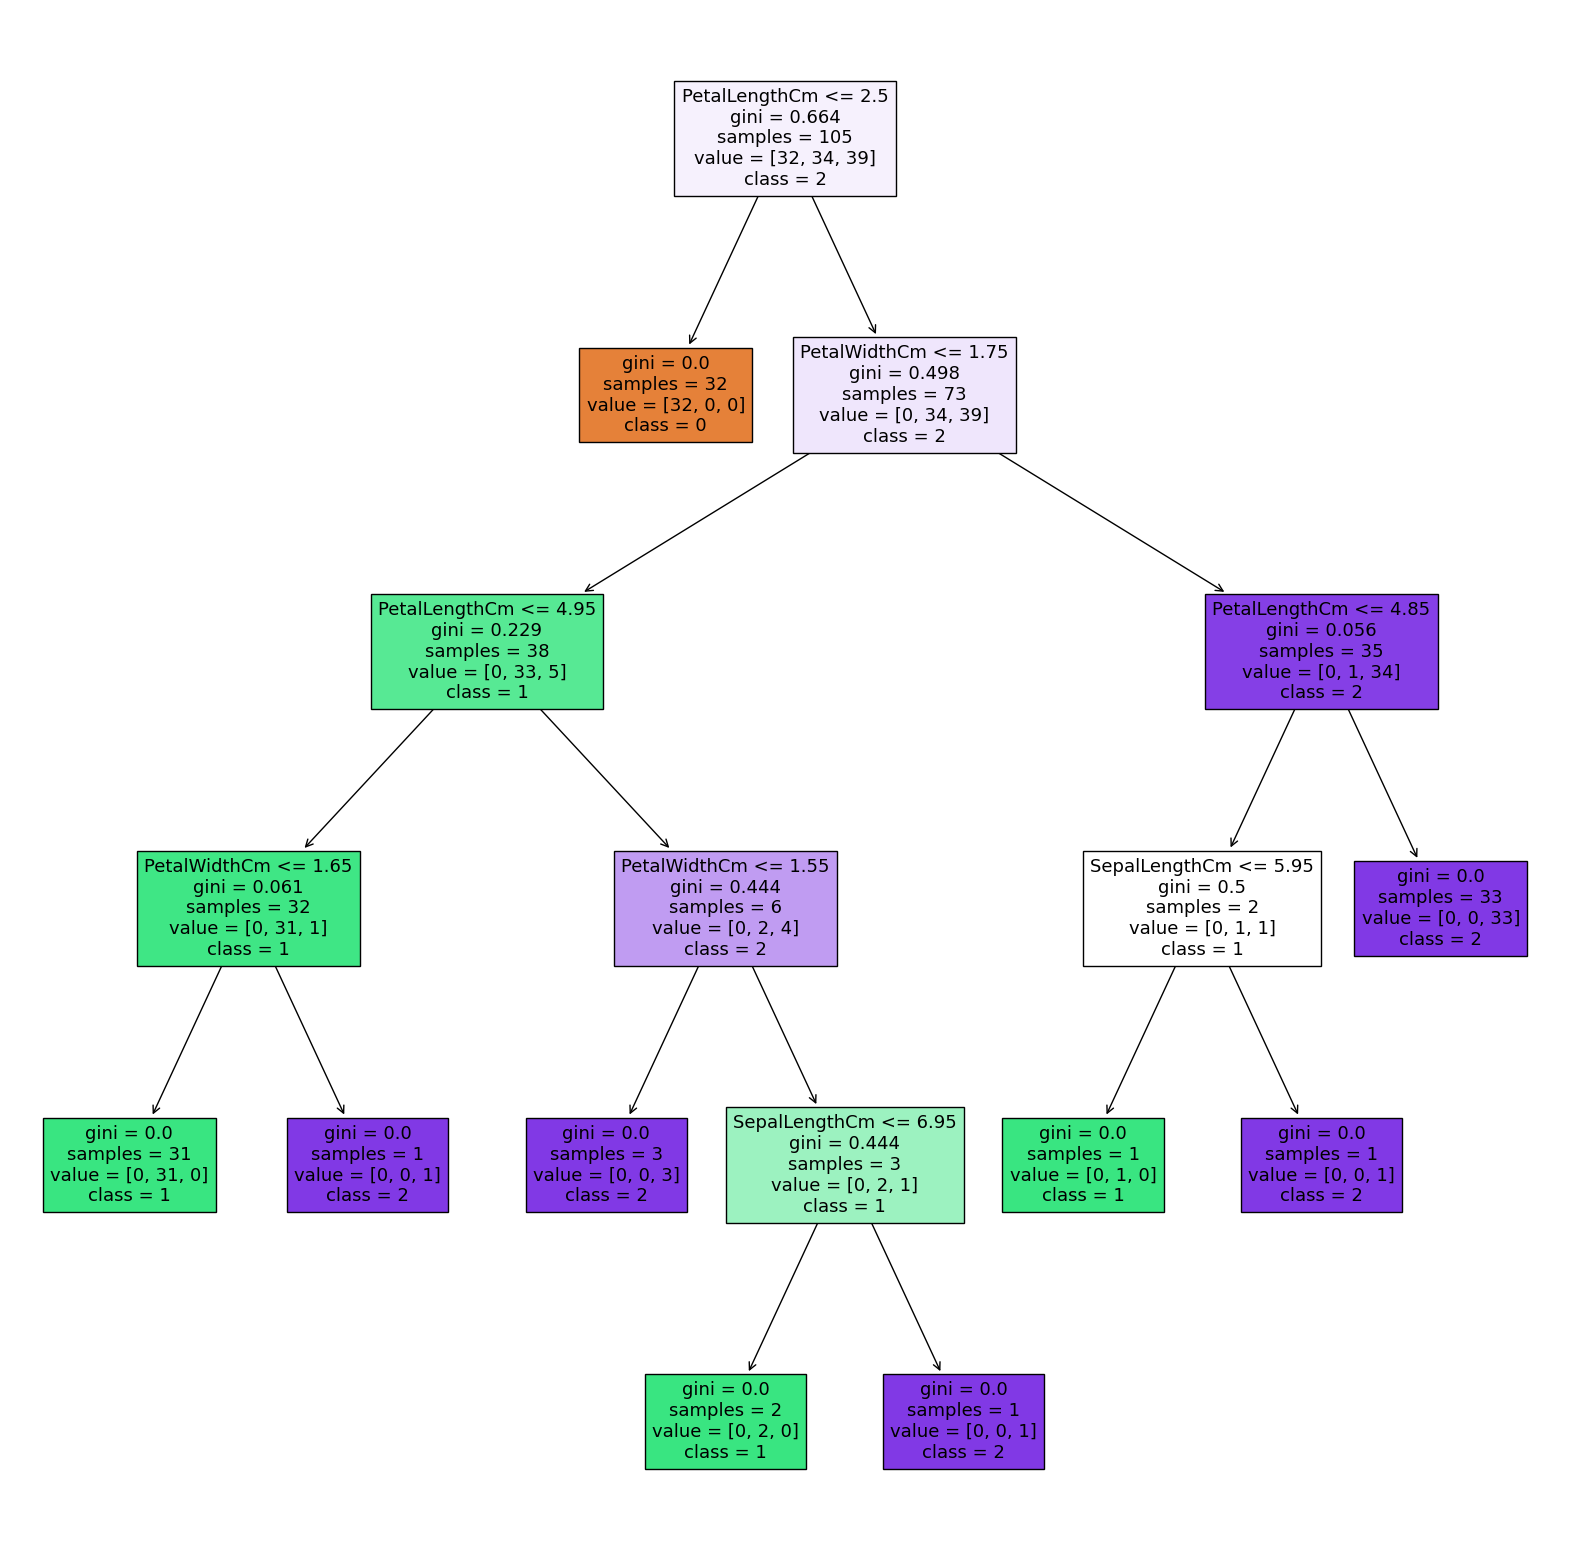

In [45]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True,class_names=[str(i) for i in set(y_data)],feature_names=x_data.columns)

### Model Accuracy

In [47]:
y_pred = dt_model.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred)

1.0

we are gettig model accuracy of 100% while te